<a href="https://colab.research.google.com/github/yanimaila/Studi-Independen/blob/main/Self%20-%20Learning/Yani_Maila__(Student)SL_05_Data_Aquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Yani Maila Santi

Class : JumaTec

## Materials
- Scraping | BeautifulSoup4 | website legal untuk scraping
  - Prequisite: Basic HTML dan CSS Selector
  > Tetapi untuk materi ini cukup ketahui cara kerja dan gambaran umumnya saja. Jika tertarik lebih dalam mengenai HTML dan CSS (terutama CSS Selector) untuk Web Scraping, dapat menggunakan referensi berikut untuk belajar tambahan:
    - [Playlist Dasar HTML by WPU](https://www.youtube.com/playlist?list=PLFIM0718LjIVuONHysfOK0ZtiqUWvrx4F) | Video
    - [Dasar HTML by Petani Kode](https://www.petanikode.com/tutorial/html/) | Artikel
    - [Dasar HTML by W3School](https://www.w3schools.com/html/) | Artikel dan Lab Hands On
    - [CSS Selector by WPU](https://www.youtube.com/watch?v=0KLwWyQyMQo&list=PLFIM0718LjIUBrbm6Gdh6k7ZUvPIAZm7p&index=7) | Video
    - [CSS Selector by W3School](https://www.w3schools.com/cssref/css_selectors.asp) | Artikel dan Lab Hands On

- Import data dari file txt
- Bag of Word (sebelum preprocessing)
- Preprocessing
  - Tokenization
  - Stemming
  - Lemmatization
- Bag of Word (Setelah Preprocessing)

#1. Web Scraping


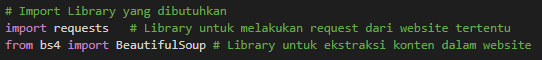

In [2]:
#ketikkan kode diatas disini!
import requests
from bs4 import BeautifulSoup
import re

Untuk website yang akan kita gunakan untuk scraping adalah website warstek.com. Website ini milik Coach Wayan dan sudah mendapatkan persetujuan untuk dijadikan objek web scraping :)

In [3]:
result = requests.get("https://id.wikipedia.org/")

In [4]:
result

<Response [200]>

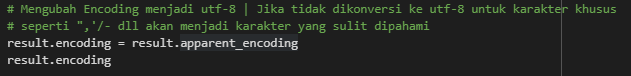

In [5]:
# Mengubah Encoding menjadi utf-8 | Jika tidak dikonversi ke utf-8 untuk karakter khusus 
# seperti ",'/- dll akan menjadi karakter yang sulit dipahami
result.encoding = result.apparent_encoding
result.encoding


'Windows-1254'

In [6]:
wp = BeautifulSoup(result.text, "html.parser")

Mengambil bagian html dengan tag 'p' paling awal (paragraph)
Silakan klik link wartek yang mengarah ke artikel https://warstek.com/kabel-laut/

Nah, pada artikel tersebut kita akan menemukan tag 'p' dengan klik kanan pada artikel lalu pilih 'Inspect'

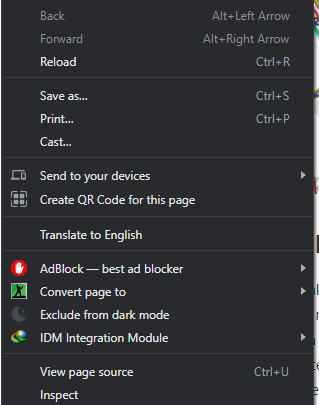

Lalu akan muncul seperti berikut,

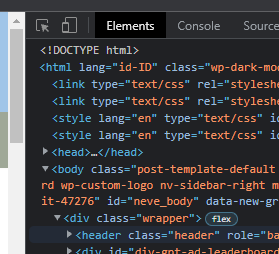

Tampilan tersebut merupakan struktur dasar dari halaman web yang berupa HTML. Struktur tersebut memiliki beberapa elemen dengan fungsinya masing - masing yang ditandai dengan adanya tag seperti `<p>`, `<img>`, `<a>`, `<table>`, `<div>` dll. 

Karena yang akan kita ambil adalah bagian konten teks dan konten teks tersebut tersimpan pada tag `<p>` (paragraph), maka kita akan menggunakan tag tersebut sebagai selector atau penanda.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Nanti akan ktemu tag 'p' seperti dibawah ini:

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

Nah, pada bagian Element itu akan muncul html untuk tag 'p' tadi, kalo mau cepat nyarinya bisa dengan pencarian cepat dengan tekan CRTL + f lalu ketik p, maka akan lebih cepat nyarinya, atau bisa juga telusuri satu-satu. Anati akan ktemu tag 'p' seperti dibawah ini:

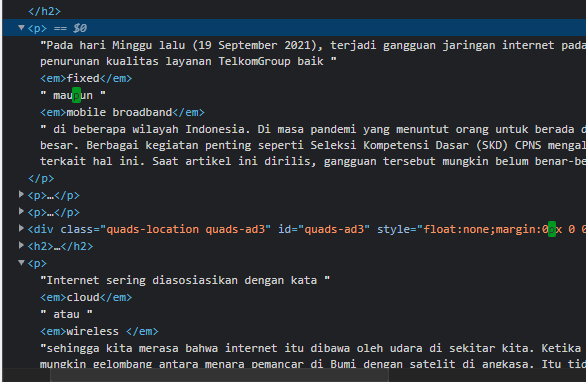

Nahh, kira-kira demikian proses buat dapetin tag 'p'-nya.

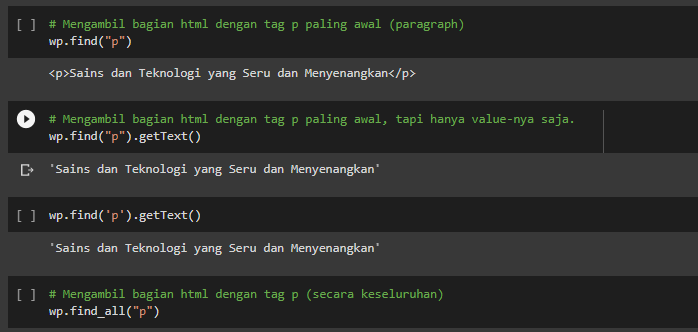

In [7]:
# Mengambil bagian html dengan tag p paling awal (paragraph)
wp.find("p")

<p>
		Halaman penyunting yang telah keluar log <a aria-label="Pelajari lebih lanjut tentang menyunting" href="/wiki/Bantuan:Pengantar"><span>pelajari lebih lanjut</span></a>
</p>

In [8]:
# Mengambil bagian html dengan tag p paling awal, tapi hanya value-nya saja.
wp.find("p").getText()

'\n\t\tHalaman penyunting yang telah keluar log pelajari lebih lanjut\n'

In [9]:
txt = wp.find("p").getText()
txt

'\n\t\tHalaman penyunting yang telah keluar log pelajari lebih lanjut\n'

In [10]:
hapus_karakter = re.sub(r'[@,.?#\n\t!]', "", txt)
hapus_karakter

'Halaman penyunting yang telah keluar log pelajari lebih lanjut'

In [11]:
# Mengambil bagian html dengan tag p (secara keseluruhan)
wp.find_all("p")

[<p>
 		Halaman penyunting yang telah keluar log <a aria-label="Pelajari lebih lanjut tentang menyunting" href="/wiki/Bantuan:Pengantar"><span>pelajari lebih lanjut</span></a>
 </p>,
 <p><b><a href="/wiki/Odinani" title="Odinani">Odinani</a></b> merupakan praktik keagamaan tradisional dan keyakinan budaya <a href="/wiki/Suku_Igbo" title="Suku Igbo">suku Igbo</a> di wilayah selatan <a href="/wiki/Nigeria" title="Nigeria">Nigeria</a>. Odinani bersifat <a class="mw-redirect" href="/wiki/Monoteistik" title="Monoteistik">monoteistik</a> dan <a href="/wiki/Panenteisme" title="Panenteisme">panenteistik</a>, dengan satu <a href="/wiki/Dewa" title="Dewa">Dewa</a> sebagai sumber segalanya. Meskipun terdapat juga <a href="/wiki/Panteon" title="Panteon">kelompok</a> roh, namun dalam Odinani kedudukannya lebih rendah, dan pada umumnya hanya berperan sebagai anasir atas Chineke (atau <a href="/wiki/Chukwu" title="Chukwu">Chukwu</a>), sang wujud atau dewa tertinggi. Kata <i>Chineke</i> adalah kata ma

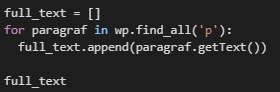

In [12]:
#lengkapilah! sesuai kode diatas!
full_text = []
for paragraf in wp.find_all('p'):
  full_text.append(paragraf.getText())

full_text

['\n\t\tHalaman penyunting yang telah keluar log pelajari lebih lanjut\n',
 "Odinani merupakan praktik keagamaan tradisional dan keyakinan budaya suku Igbo di wilayah selatan Nigeria. Odinani bersifat monoteistik dan panenteistik, dengan satu Dewa sebagai sumber segalanya. Meskipun terdapat juga kelompok roh, namun dalam Odinani kedudukannya lebih rendah, dan pada umumnya hanya berperan sebagai anasir atas Chineke (atau Chukwu), sang wujud atau dewa tertinggi. Kata Chineke adalah kata majemuk yang mencakup konsep chÃ\xad yang artinya pencipta, nÃ\xa0 yang berarti 'yang', sedangkan Ã©kÃ¨ berarti menciptakan. Sehingga Chineke dapat diartikan sebagai Pencipta atau Dewa yang menciptakan segala hal. Konsep ChÃºkwÃº ('chi tertinggi') disebarkan oleh suku Aro-Igbo dari Arochukwu di wilayah timur Igboland dan pengaruh spiritualnya banyak ditemui di Delta Nigeria timur pada abad ke-18 karena kegiatan peramal Ibini Ukpabi. (Selengkapnya...)\n",
 'Artikel pilihan sebelumnya: Izaac Hindom â€“ Kamp

> Terlihat bahwa link text masih banyak whitespace atau spasi kosong yang terdapat pada list sehingga perlu dibersihkan juga.

In [13]:
# Menghapus None dari list full_text sekaligus membersihkan elemen list dari whitespace menggunakan fungsi strip()
# List Comprehension
full_text = [paragraf.strip() for paragraf in full_text if paragraf != ""]
full_text

['Halaman penyunting yang telah keluar log pelajari lebih lanjut',
 "Odinani merupakan praktik keagamaan tradisional dan keyakinan budaya suku Igbo di wilayah selatan Nigeria. Odinani bersifat monoteistik dan panenteistik, dengan satu Dewa sebagai sumber segalanya. Meskipun terdapat juga kelompok roh, namun dalam Odinani kedudukannya lebih rendah, dan pada umumnya hanya berperan sebagai anasir atas Chineke (atau Chukwu), sang wujud atau dewa tertinggi. Kata Chineke adalah kata majemuk yang mencakup konsep chÃ\xad yang artinya pencipta, nÃ\xa0 yang berarti 'yang', sedangkan Ã©kÃ¨ berarti menciptakan. Sehingga Chineke dapat diartikan sebagai Pencipta atau Dewa yang menciptakan segala hal. Konsep ChÃºkwÃº ('chi tertinggi') disebarkan oleh suku Aro-Igbo dari Arochukwu di wilayah timur Igboland dan pengaruh spiritualnya banyak ditemui di Delta Nigeria timur pada abad ke-18 karena kegiatan peramal Ibini Ukpabi. (Selengkapnya...)",
 'Artikel pilihan sebelumnya: Izaac Hindom â€“ Kampung Boy (s

In [14]:
full_text = ' '.join(full_text)
full_text

"Halaman penyunting yang telah keluar log pelajari lebih lanjut Odinani merupakan praktik keagamaan tradisional dan keyakinan budaya suku Igbo di wilayah selatan Nigeria. Odinani bersifat monoteistik dan panenteistik, dengan satu Dewa sebagai sumber segalanya. Meskipun terdapat juga kelompok roh, namun dalam Odinani kedudukannya lebih rendah, dan pada umumnya hanya berperan sebagai anasir atas Chineke (atau Chukwu), sang wujud atau dewa tertinggi. Kata Chineke adalah kata majemuk yang mencakup konsep chÃ\xad yang artinya pencipta, nÃ\xa0 yang berarti 'yang', sedangkan Ã©kÃ¨ berarti menciptakan. Sehingga Chineke dapat diartikan sebagai Pencipta atau Dewa yang menciptakan segala hal. Konsep ChÃºkwÃº ('chi tertinggi') disebarkan oleh suku Aro-Igbo dari Arochukwu di wilayah timur Igboland dan pengaruh spiritualnya banyak ditemui di Delta Nigeria timur pada abad ke-18 karena kegiatan peramal Ibini Ukpabi. (Selengkapnya...) Artikel pilihan sebelumnya: Izaac Hindom â€“ Kampung Boy (seri telev

#2. Crawling Data From Tweeter

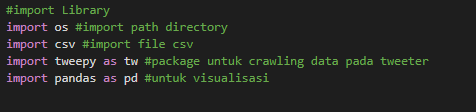

In [15]:
#import Library
 #import path directory
 #import file csv
 #package untuk crawling data pada tweeter
 #untuk visualisasi
import os
import csv
import tweepy as tw
import pandas as pd

In [16]:
#emanggil data dari tweeter menggunakan API 
access_token = "3760416139-MLn5ifjLKCSXh4dWrgmOsSpQ6lYvefNkbQNuM35"
access_token_secret ="KsKpKqYwCli8YDNJg15y8ZW0quVlfGwrUCrOX4xLZHMaE"
consumer_key ="gchYjFhHc48sIveGC8fMVa2Sw"
consumer_secret="F4wR4cp8CIcAhkUgVFtrOZDg9CDKaroN9O0dkh2vSxgubnoKCb"

cara mengambil token data pada tweeter dengan API:

https://youtu.be/ECPjw0w-qK0

In [17]:
auth = tw.OAuthHandler(consumer_key, consumer_secret) #memanggil data concumer_key, consumer_secret
auth.set_access_token(access_token, access_token_secret) #memanggil access_token, access_token_secret
api = tw.API(auth, wait_on_rate_limit=True) #autentifikasi ke twitter

pencarian topik

In [18]:
search_words = "sejarah"

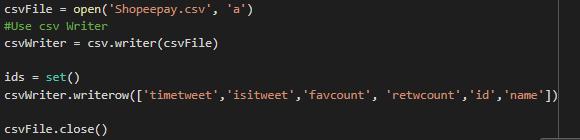

In [19]:
#Lengkapilah code berikut sesuaikan pada kode diatas!

csvFile = open('sejarah.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

ids = set()
csvWriter.writerow(['timetweet','isitweet','favcount', 'retwcount','id','name'])

csvFile.close()

In [ ]:
csvFile = open('sejarah.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)

ids = set()

for tweet in  tw.Cursor(api.search,
                   q=search_words,
                   date ='2020-12-12', 
                   lang='id', 
                   tweet_mode = 'extended').items(90000):
  #if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
    #Write a row to the csv file/ I use encode utf-8
    csvWriter.writerow([tweet.created_at, tweet.full_text.encode('utf_8'), tweet.favorite_count, tweet.retweet_count, tweet.id, tweet.user.screen_name])
    #print "...%s tweets downloaded so far" % (len(tweet.id))
    ids.add(tweet.id) # add new id
    #print ("number of unique ids seen so far: {}",format(len(ids)))
csvFile.close()

In [22]:
#with open(path, 'rb') as f: contens = f.read()
df = pd.read_csv('sejarah.csv')
df.head()

,timetweet,isitweet,favcount,retwcount,id,name
0,2022-09-27 12:59:25,"b'RT @WidiarsoKris: @MKrenthil ""Tidak ada dala...",0,1,1574745527581036545,olfan_nanang
1,2022-09-27 12:59:22,b'RT @ekowboy2: Dulu Jendral A Yani difitnah P...,0,1102,1574745512460230658,HelmiRahim
2,2022-09-27 12:59:17,b'RT @tijabar: Penghianatan G30S PKI\nSejarah ...,0,595,1574745491434196992,moko_putri
3,2022-09-27 12:59:15,b'RT @JatIkhwan: Aku ingat berita troll je yan...,0,1181,1574745483733762049,nfabfm
4,2022-09-27 12:59:13,b'RT @BTrack305: JANGAN LUPAKAN SEJARAH PEMBER...,0,622,1574745473982005248,ilhamhamdani86


In [23]:
len(df.index)

1477